In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data=pd.read_csv("/content/drive/MyDrive/Datasets/fake_or_real_news.csv")
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
data=data.iloc[:,1:]
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
data.shape

(6335, 3)

In [5]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [6]:
## get the independent feature which are for our work important


In [7]:
y=data["label"]
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [8]:
x=data["title"]
x.head()

0                         You Can Smell Hillary’s Fear
1    Watch The Exact Moment Paul Ryan Committed Pol...
2          Kerry to go to Paris in gesture of sympathy
3    Bernie supporters on Twitter erupt in anger ag...
4     The Battle of New York: Why This Primary Matters
Name: title, dtype: object

In [10]:
## now check the label count using countplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


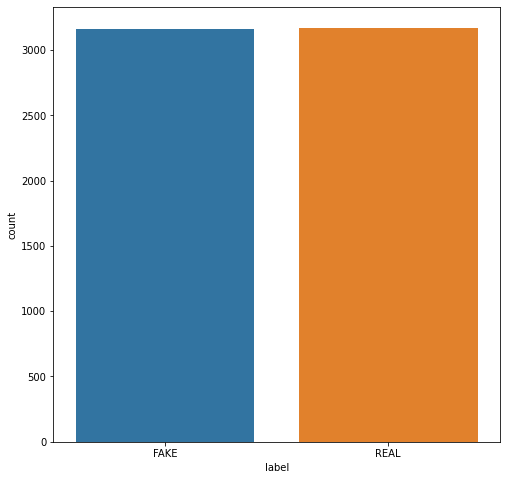

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(y)

There are almost same commet of fake and Real. so there is not any imbalanced data

In [14]:
## Now have a look at the distribution using the piechart

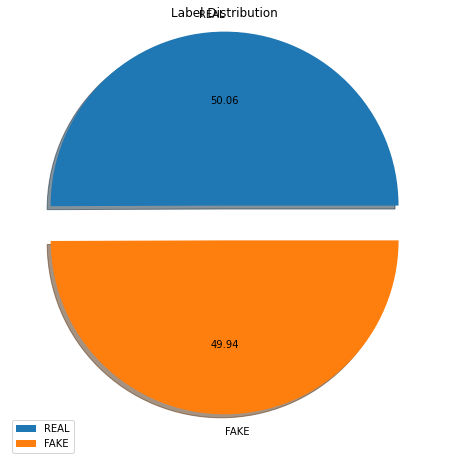

In [27]:
keys=y.value_counts().index
values=y.value_counts().values
plt.figure(figsize=(8,8))
plt.title("Label Distribution")
myexplode = [0.2, 0,]
plt.pie(values,labels=keys,shadow=True,explode=myexplode,autopct='%.2f')
plt.legend()
plt.show()

In [29]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [34]:
## Import all the Important tensorflow libraries for the LSTM-RNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional

In [36]:
#firlsly set the vocubary size 
voc_size=5000

In [37]:
messeges=x.copy()
messeges.head()

0                         You Can Smell Hillary’s Fear
1    Watch The Exact Moment Paul Ryan Committed Pol...
2          Kerry to go to Paris in gesture of sympathy
3    Bernie supporters on Twitter erupt in anger ag...
4     The Battle of New York: Why This Primary Matters
Name: title, dtype: object

In [39]:
## Text preprocessing
import nltk
import re
from nltk.corpus import stopwords

In [40]:
from nltk.stem import PorterStemmer
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
ps=PorterStemmer()
stops=set(stopwords.words("english"))
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [43]:
def preprocessing(x):
  text=re.sub("[^a-zA-Z0-9]"," ",x)
  text=text.lower()
  text=text.split()
  text=[ps.stem(word) for word in text if word not in stops]
  text=" ".join(text)
  return text

In [44]:
preprocessing("Hey mr. Jai@kunad939 583%5992%273 Not all.la ( dflaj")

'hey mr jai kunad939 583 5992 273 la dflaj'

In [45]:
x=x.apply(preprocessing)
x.head()

0                                   smell hillari fear
1    watch exact moment paul ryan commit polit suic...
2                        kerri go pari gestur sympathi
3       berni support twitter erupt anger dnc tri warn
4                        battl new york primari matter
Name: title, dtype: object

In [68]:
## Now make the WordCloud to see the Words Distribution over the Text
from wordcloud import WordCloud,STOPWORDS

In [66]:
wordc_text = " ".join(cat for cat in x)
wordc_text

'smell hillari fear watch exact moment paul ryan commit polit suicid trump ralli video kerri go pari gestur sympathi berni support twitter erupt anger dnc tri warn battl new york primari matter tehran usa girl horrifi watch boyfriend left facetim britain schindler die 106 fact check trump clinton command chief forum iran reportedli make new push uranium concess nuclear talk three clinton iowa glimps fire elud hillari clinton campaign donald trump shockingli weak deleg game somehow got even wors strong solar storm tech risk today s0 news oct 26 2016 video 10 way america prepar world war 3 trump take cruz lightli women lead differ shock michel obama hillari caught glamor date rape promot hillari clinton huge troubl america notic sick thing hidden pictur liberti writer news iran bill obama like 1 chart explain everyth need know partisanship america slipperi slope trump propos ban muslim episod 160 sunday wire hail deplor special guest randi j hillari clinton make bipartisan appeal staten 

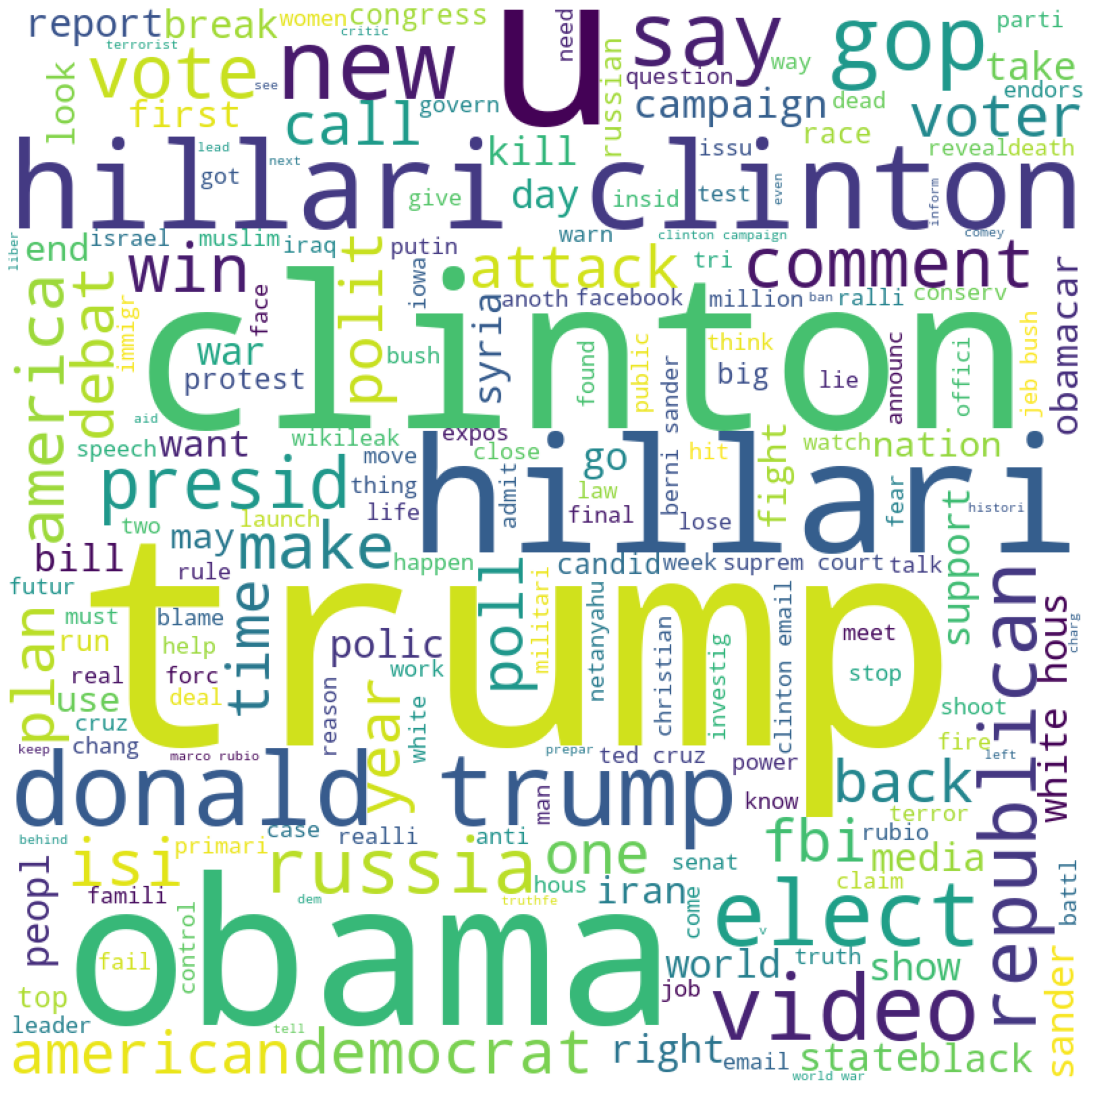

In [70]:
stopwords=set(STOPWORDS)
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(wordc_text)

# plot the WordCloud image                      
plt.figure(figsize = (15,15), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [71]:
x

0                                      smell hillari fear
1       watch exact moment paul ryan commit polit suic...
2                           kerri go pari gestur sympathi
3          berni support twitter erupt anger dnc tri warn
4                           battl new york primari matter
                              ...                        
6330       state depart say find email clinton specialist
6331                        p pb stand plutocrat pentagon
6332             anti trump protest tool oligarchi inform
6333    ethiopia obama seek progress peac secur east a...
6334                jeb bush suddenli attack trump matter
Name: title, Length: 6335, dtype: object

## For the One hot we need to make a corpus

In [76]:
corpus=[]
for i in x:
  corpus.append(i)
print(corpus)

['smell hillari fear', 'watch exact moment paul ryan commit polit suicid trump ralli video', 'kerri go pari gestur sympathi', 'berni support twitter erupt anger dnc tri warn', 'battl new york primari matter', 'tehran usa', 'girl horrifi watch boyfriend left facetim', 'britain schindler die 106', 'fact check trump clinton command chief forum', 'iran reportedli make new push uranium concess nuclear talk', 'three clinton iowa glimps fire elud hillari clinton campaign', 'donald trump shockingli weak deleg game somehow got even wors', 'strong solar storm tech risk today s0 news oct 26 2016 video', '10 way america prepar world war 3', 'trump take cruz lightli', 'women lead differ', 'shock michel obama hillari caught glamor date rape promot', 'hillari clinton huge troubl america notic sick thing hidden pictur liberti writer news', 'iran bill obama like', '1 chart explain everyth need know partisanship america', 'slipperi slope trump propos ban muslim', 'episod 160 sunday wire hail deplor spec

In [77]:
onehot_represention=[one_hot(words,voc_size) for words in corpus]
onehot_represention


[[1967, 3946, 4445],
 [560, 794, 3760, 3048, 1524, 4318, 2646, 466, 3091, 4520, 2431],
 [2114, 2047, 2176, 1255, 1863],
 [1400, 25, 3693, 546, 5, 4836, 1193, 1107],
 [2819, 733, 1182, 3472, 962],
 [1553, 592],
 [4976, 399, 560, 2582, 3793, 1502],
 [2768, 771, 2305, 3915],
 [4534, 3942, 3091, 2311, 186, 2492, 2746],
 [1511, 4440, 3731, 733, 255, 3549, 1761, 739, 150],
 [4377, 2311, 519, 903, 1819, 1108, 3946, 2311, 682],
 [3084, 3091, 4491, 2392, 1952, 359, 1525, 1613, 3245, 38],
 [3153, 3288, 539, 4898, 2695, 2056, 4400, 4706, 1804, 428, 1369, 2431],
 [4926, 470, 1016, 4125, 2970, 444, 1662],
 [3091, 2209, 3400, 4587],
 [3008, 2838, 4977],
 [220, 2903, 3064, 3946, 4919, 1521, 4553, 4233, 3971],
 [3946, 2311, 4972, 4366, 1016, 2324, 2331, 625, 4677, 4905, 2614, 3055, 4706],
 [1511, 4757, 3064, 3474],
 [1885, 2108, 4242, 3897, 3758, 3032, 2906, 1016],
 [3702, 3750, 3091, 2716, 3684, 3196],
 [2411, 3444, 2863, 150, 15, 2993, 1184, 429, 1070, 2995],
 [3946, 2311, 3731, 3569, 4363, 2645, 46

## Embedding Represition

In [78]:
sent_length=20
embedded_docs=pad_sequences(onehot_represention,maxlen=sent_length,padding="pre")
embedded_docs

array([[   0,    0,    0, ..., 1967, 3946, 4445],
       [   0,    0,    0, ..., 3091, 4520, 2431],
       [   0,    0,    0, ..., 2176, 1255, 1863],
       ...,
       [   0,    0,    0, ..., 4911,  264, 3711],
       [   0,    0,    0, ..., 4572, 4599, 2518],
       [   0,    0,    0, ..., 1154, 3091,  962]], dtype=int32)

In [81]:
## Now Creating the model
embedding_feature_values=40
model=Sequential()
model.add(Embedding(voc_size,embedding_feature_values,input_length=sent_length,))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
## now train_test_split
final_x=np.array(embedded_docs)
final_y=np.array(np.where(y=="REAL",1,0))

In [83]:
final_x

array([[   0,    0,    0, ..., 1967, 3946, 4445],
       [   0,    0,    0, ..., 3091, 4520, 2431],
       [   0,    0,    0, ..., 2176, 1255, 1863],
       ...,
       [   0,    0,    0, ..., 4911,  264, 3711],
       [   0,    0,    0, ..., 4572, 4599, 2518],
       [   0,    0,    0, ..., 1154, 3091,  962]], dtype=int32)

In [84]:
final_y

array([0, 0, 1, ..., 0, 1, 1])

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.33, random_state=0)

In [87]:
## model Training
hist=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1,batch_size=64)

Epoch 1/10
67/67 [==============================] - 15s 155ms/step - loss: 0.6403 - accuracy: 0.6100 - val_loss: 0.5024 - val_accuracy: 0.7451
Epoch 2/10
67/67 [==============================] - 5s 70ms/step - loss: 0.3762 - accuracy: 0.8398 - val_loss: 0.4888 - val_accuracy: 0.7781
Epoch 3/10
67/67 [==============================] - 6s 90ms/step - loss: 0.2505 - accuracy: 0.9046 - val_loss: 0.5628 - val_accuracy: 0.7714
Epoch 4/10
67/67 [==============================] - 6s 82ms/step - loss: 0.1654 - accuracy: 0.9404 - val_loss: 0.6113 - val_accuracy: 0.7681
Epoch 5/10
67/67 [==============================] - 5s 69ms/step - loss: 0.1082 - accuracy: 0.9656 - val_loss: 0.7078 - val_accuracy: 0.7704
Epoch 6/10
67/67 [==============================] - 7s 108ms/step - loss: 0.0809 - accuracy: 0.9755 - val_loss: 0.8319 - val_accuracy: 0.7642
Epoch 7/10
67/67 [==============================] - 5s 70ms/step - loss: 0.0609 - accuracy: 0.9816 - val_loss: 0.9719 - val_accuracy: 0.7566
Epoch 8/10

In [88]:
y_pred=model.predict(x_test)
y_pred

66/66 [==============================] - 2s 17ms/step


array([[9.9892431e-01],
       [9.9702346e-01],
       [9.3470717e-08],
       ...,
       [9.9989259e-01],
       [2.6591468e-01],
       [3.1777734e-03]], dtype=float32)

In [92]:
y_result=np.where(y_pred>0.5,1,0)

In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_result)

array([[771, 256],
       [251, 813]])

In [98]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(y_test, y_result))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1027
           1       0.76      0.76      0.76      1064

    accuracy                           0.76      2091
   macro avg       0.76      0.76      0.76      2091
weighted avg       0.76      0.76      0.76      2091

